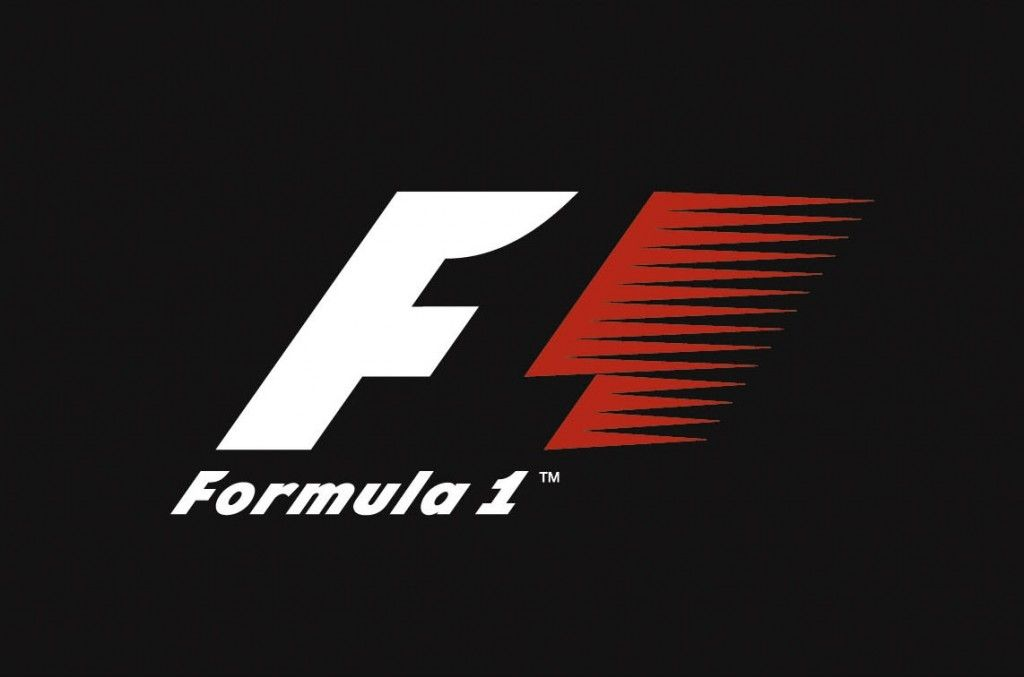

In [20]:
from IPython.display import Image
Image("/Users/isaacshareef/Desktop/Python_Code/Jupyter_Notebook/Data/logo.jpg")

## How long does it take to become a Formula 1 Champion?  How many races?  How many poles? How do your odds of becoming a World Champion increase as you rack up pole position race after race?

## What is the probability of becoming a World Champion in the most advanced auto racing the world has ever seen?  The data used in this Logistic Regression Analysis will give you into insights into who the drivers are with the highest probabilities of becoming the next Formula 1 Drivers Champions.  

The logo above is trademarked by the FIA.  The FIA is in no way is involved with this analysis.  The features of this analysis are publicy available via the internet.

### Author: Isaac Shareef  
### May, 2020


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [39]:
data = pd.read_csv(
'/Users/isaacshareef/Desktop/Python_Code/Jupyter_Notebook/Data/champions list.csv'
)

 The data loaded into this analysis is a .csv that has the data of the top 100 Formula 1 drivers of all time.  The data goes back to 1950 and is current through the Championship of Lewis Hamilton in 2019.  The features of the data set are: `Driver`, `races`, `first place`finishes, `second place` finishes, `third place` finishes, `podiums`, `pole positions`, `fastest laps`, `points` scored and the labels associated are a binary `"is champion" = 1`, or `"is not champion" = 0`.  

The classification predictions in a sport  like race car driving pretty obvious for starters.  The more races you win, the higher the probability of becoming a drivers champion.  However, when we want to make future predictions on which drivers have the highest probability of becoming that next drivers champion, we can use all available features in the data to help us make more informed decisions.

If you were a team owner or a betting fan, the insights in the data of the top 100 drivers and previous champions can be useful as a tool in deciding which driver to invest millions in or which driver to place a wager on.



In [40]:
#Lets take a look at the first 5 rows of data
data.head()

,0,driver,races,first,second,third,podiums,poles,fastest,points,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,2019,Lewis Hamilton,Mercedes,Mercedes.1,Mercedes.2
0,1,Lewis Hamilton,250,84,39,28,151,88,47,3431.0,...,NaN,NaN,NaN,NaN,NaN,2018.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
1,2,Sebastian Vettel,240,53,35,32,120,57,38,2985.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
2,3,Fernando Alonso,311,32,37,28,97,22,23,1899.0,...,NaN,NaN,NaN,NaN,NaN,2016.0,Nico Rosberg,Mercedes,Mercedes,Mercedes
3,4,Kimi Räikkönen,313,21,37,45,103,18,46,1854.0,...,NaN,NaN,NaN,NaN,NaN,2015.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
4,5,Nico Rosberg,206,23,25,9,57,30,20,1594.5,...,NaN,NaN,NaN,NaN,NaN,2014.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes


In [60]:
#Assigning a variable named features to capture all of the data we want in the features matrix.
features = data[data.columns[1:11]]
labels = data.is_champion

In [42]:
features.head()

,driver,races,first,second,third,podiums,poles,fastest,points,is_champion
0,Lewis Hamilton,250,84,39,28,151,88,47,3431.0,1
1,Sebastian Vettel,240,53,35,32,120,57,38,2985.0,1
2,Fernando Alonso,311,32,37,28,97,22,23,1899.0,1
3,Kimi Räikkönen,313,21,37,45,103,18,46,1854.0,1
4,Nico Rosberg,206,23,25,9,57,30,20,1594.5,1


Creating the variables that define our features, using arrays and reshaping them for use in the analysis

In [43]:
#feature arrays of the top 100 drivers
points = np.array(data.points).reshape(-1,1)
fastest = np.array(data.fastest).reshape(-1,1)
poles = np.array(data.poles).reshape(-1,1)
podiums = np.array(data.podiums).reshape(-1,1)
third_pl = np.array(data.third).reshape(-1,1)
secnd_pl = np.array(data.second).reshape(-1,1)
first_pl = np.array(data['first']).reshape(-1,1)
driver = np.array(data.driver).reshape(-1,1)
races = np.array(data.races).reshape(-1,1)

#defining label
label = labels

In [44]:
#flat array for label
label = np.ravel(label)

In [45]:
#object named model thats an instance of the LogisticRegression class
model = LogisticRegression()

In [46]:
# creating a function to facilitate gettiing the coefficients of the features
def calc_coeff(feature):
    model.fit(feature, label)
    return model.coef_

In [47]:
#Feature coefficients derived from the calc_coeff function
points_coeff = calc_coeff(points)
fastest_coeff = calc_coeff(fastest)
poles_coeff = calc_coeff(poles)
podiums_coeff = calc_coeff(podiums)
third_pl_coeff = calc_coeff(third_pl)
secnd_pl_coeff = calc_coeff(secnd_pl)
first_pl_coeff = calc_coeff(first_pl)
races_coeff = calc_coeff(races)

#creating a list of feature coefficients
coeffs = [points_coeff,
          fastest_coeff,
          poles_coeff,
          podiums_coeff,
          third_pl_coeff,
          secnd_pl_coeff,
          first_pl_coeff,
          races_coeff]

#creating a list of feature labels for plotting in Matplotlib
features = ['Total Pts',
            'Fastest Laps',
            'Poles',
            'Podiums',
            '# of 3rd_pl',
            '# of 2nd_pl',
            '# of wins',
            '# races'
           ]

def flat(list):
    flat_coeff = []
    for sublist in list:
        for item in sublist:
            flat_coeff.append(item)
    return flat_coeff

flat_label = flat(coeffs)

#arrange the data for display in a bar chart
y_pos = np.arange(len(features))
x_pos = [i.tolist() for i in flat_label]

#flatten x_pos
x_flat = [val for sublist in x_pos for val in sublist]

We want to plot the feature coefficients in a bar chart to look at their significance relative to eachother and how they will effect the feature arrays during matrix multiplication.

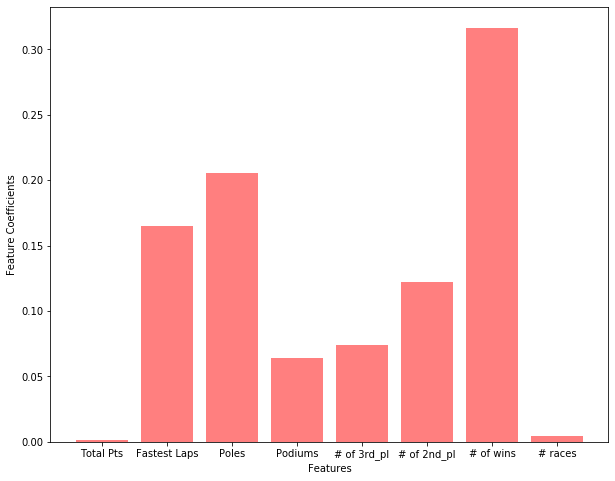

In [48]:
fig, ax = plt.subplots(figsize = (10,8))

plt.bar(y_pos, x_flat, width = 0.8, color = 'r', alpha = 0.5)
plt.xticks(y_pos, features)

plt.xlabel("Features")
plt.ylabel("Feature Coefficients")

plt.show()


It is very logical and no surprise that the number of wins would have the highest effect on predicting a drivers class as World Champion or not.  But its interesting to note that the number of pole positions and fastest laps are the 2 next determinants bigest determinants of classification.  The number of races is negligable as is your total number of points.  For example, if you score many points with loads of third place finishes, your probability of classifying as a drivers champion is limited.

These data points will become even more significant later as we compare todays drivers' actual stats of wins, poles, and fastest laps to see who are the most probable future drivers champions.

In [49]:
dictionary = dict(zip(features, x_flat))
dictionary

{'Total Pts': 0.0016607990730547536,
 'Fastest Laps': 0.1646603325874732,
 'Poles': 0.20520368785324897,
 'Podiums': 0.06426467666203246,
 '# of 3rd_pl': 0.07375673146889604,
 '# of 2nd_pl': 0.12205441945776668,
 '# of wins': 0.3165705170375108,
 '# races': 0.00465139599813472}

While its important to know how the coefficients contribute to our prediction, its better to know how the probabilities affect classification.  We are going to create different Logistic Regression models and predict the range of probabilites from wins, pole positions, etc.. The threshold we are interested in is 50%.  For example we want to know at how many number of career races won puts you in a place to have better than 50% odds of being classified as a drivers champion.  It's likely as well that a driver that is above the 50% threshold to date that hasnt't been a drivers champion is likely to be become one in the future.

In [50]:
#wins modeling
wins_model = LogisticRegression()
wins_model.fit(first_pl, label)

#generate the win probabilities
win_samples = np.arange(0, 100, 1)
win_probs= []

for i in win_samples:
    win_loss, win_win = wins_model.predict_proba([[i]])[0]
    win_probs.append(win_win)

#points modeling
points_model = LogisticRegression()
points_model.fit(points, label)

#generate points probabilities
point_samples = np.arange(0, 4000, 1)
point_probs = []

for i in point_samples:
    point_loss, point_win = points_model.predict_proba([[i]])[0]
    point_probs.append(point_win)
    
#pole position modeling
poles_model = LogisticRegression()
poles_model.fit(poles, label)

#generate pole position probabilities to predict world champion probabilities
pole_samples = np.arange(0, 90, 1)
pole_probs = []

for i in pole_samples:
    pole_loss, pole_win = poles_model.predict_proba([[i]])[0]
    pole_probs.append(pole_win)

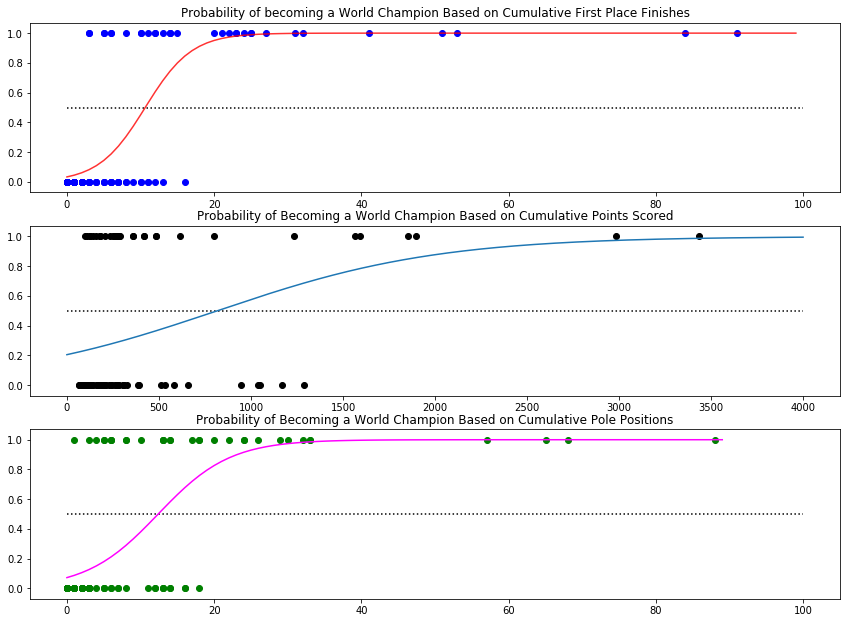

In [56]:
fig, axs = plt.subplots(3)
plt.subplots_adjust(bottom = 1, top = 3, right = 2)

axs[0].scatter(data['first'], label, color = 'blue')
axs[0].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[0].plot(win_samples, win_probs, alpha = 0.8, color = 'r')
axs[0].set_title('Probability of becoming a World Champion Based on Cumulative First Place Finishes')

axs[1].scatter(data.points, label, color = 'black')
axs[1].hlines(0.5, 0, 4000, linestyle = 'dotted', label = '50%')
axs[1].plot(point_samples, point_probs)
axs[1].set_title('Probability of Becoming a World Champion Based on Cumulative Points Scored')

axs[2].scatter(data.poles, label, color = 'green')
axs[2].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[2].plot(pole_samples, pole_probs, color = 'magenta')
axs[2].set_title('Probability of Becoming a World Champion Based on Cumulative Pole Positions')

plt.show()

We can see from the uppermost plot at the top that once a driver surpasses approximately 11 career 1st place finishes that their probability of classifying as a drivers champion puts them above the 50% threshold.  If you were a team owner and a new sensational driver just became available, and he had 10 career Formula 1 wins.  The future possibilites are in the probabilities.

What if you were looking for a mature driver that had a good record of scoring points but your investment was not just about having a body in the cockpit, but a driver who predictive analytics said could be classified a drivers champion?  Drivers points totals may not be a resume feature you want to look at as you are competing for talent based on the model.

The number of historical pole positions is significant as well as the number of fastest laps.  Charles Leclerc had 5 pole position starts in the 2019 F1 season.  This trend is significant and the possibility of him becoming a future world champion is more likely than Romain Grosjean who has more points, second and third place finishes.

Text(0.5, 1.0, '# of Races vs Is Champion')

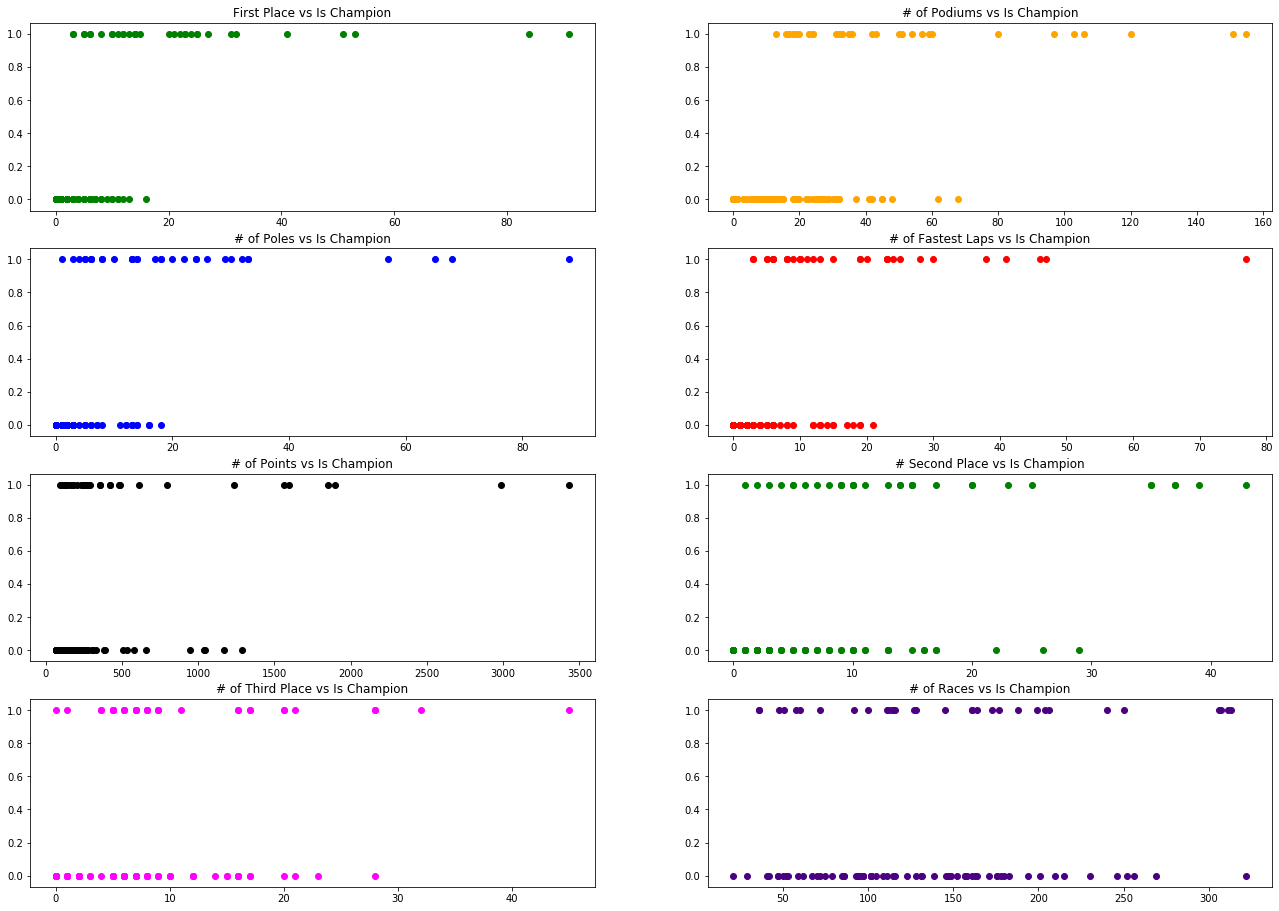

In [52]:
#plots of all features vs labels
fig, axs = plt.subplots(4,2)
plt.subplots_adjust(bottom = 1, top = 4, right = 3)

axs[0,0].scatter(data['first'], label, color = 'g')
axs[0,0].set_title('First Place vs Is Champion')

axs[0,1].scatter(data.podiums, label, color = 'orange')
axs[0,1].set_title('# of Podiums vs Is Champion')

axs[1,0].scatter(data.poles, label, color = 'b')
axs[1,0].set_title('# of Poles vs Is Champion')

axs[1,1].scatter(data.fastest, label, color = 'r')
axs[1,1].set_title('# of Fastest Laps vs Is Champion')

axs[2,0].scatter(data.points, label, color = 'black')
axs[2,0].set_title('# of Points vs Is Champion')

axs[2,1].scatter(data.second, label, color = 'g')
axs[2,1].set_title('# Second Place vs Is Champion')

axs[3,0].scatter(data.third, label, color = 'magenta')
axs[3,0].set_title('# of Third Place vs Is Champion')

axs[3,1].scatter(data.races, label, color = 'indigo')
axs[3,1].set_title('# of Races vs Is Champion')

In [53]:
hist_feat = data[data.columns[1:10]]
hist_feat.head()

,driver,races,first,second,third,podiums,poles,fastest,points
0,Lewis Hamilton,250,84,39,28,151,88,47,3431.0
1,Sebastian Vettel,240,53,35,32,120,57,38,2985.0
2,Fernando Alonso,311,32,37,28,97,22,23,1899.0
3,Kimi Räikkönen,313,21,37,45,103,18,46,1854.0
4,Nico Rosberg,206,23,25,9,57,30,20,1594.5


### The top 5 of the top 100 drivers that have not won a drivers championship
1) Valtteri Bottas
2) Daniel Ricciardo
3) Max Verstappen
4) Sergio Pérez
5) Romain Grosjean

The arrays below can be used to plot against probabilities

In [62]:
dr = np.array(features.loc[driver == 'Daniel Ricciardo'])
sp = np.array(features.loc[features.driver == 'Sergio Pérez'])
mv = np.array(features.loc[features.driver == 'Max Verstappen'])
vb = np.array(features.loc[features.driver == 'Valteri Bottas'])
rg = np.array(features.loc[features.driver == 'Romain Grosjean'])


### Conclusion:
While Logistic Regression is a useful tool for classification analysis the `model.predict_proba` method was more useful as it provided the probabilities associated with the classification.  While I did not have a `test` set to test this analysis the learning process was more useful than the ability to use the predict which class of driver a sample a driver belongs to.  Much of the output of this model is intuitive but it also provides insights into who is more likely to be a drivers champion in the future.